# Global CO₂ Emissions Analysis (1960–2019)

## **Project Overview**  
This project analyzes **historical CO₂ emissions** from **1960 to 2019** across different countries and regions. Our goal is to explore global emission trends, identify key contributors, and investigate anomalies linked to historical events.  

## **Key Objectives**  
- **Data Processing & Cleaning:** Load, clean, and structure CO₂ emission data.  
- **Visualization:** Use **Matplotlib** to plot global trends, top emitters, and historical anomalies.  
- **Statistical Insights:** Use **NumPy & Pandas** to extract meaningful insights.  
- **Historical Analysis:** Investigate real-world events affecting emissions.  
- **Climate Focus:** Showcase the impact of wars, industrialization, and policies on emissions.  

## **Skills Demonstrated**  
🔹 **Pandas**: Data manipulation & analysis  
🔹 **Matplotlib**: Data visualization  
🔹 **NumPy**: Numerical computations  
🔹 **Scientific Research**: Data-driven storytelling  

## **Final Outcome**  
This project will serve as both a **portfolio piece** and a **research-driven insight** into CO₂ emissions. It will also provide a **clean dataset** for future **Machine Learning** predictions.  


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Get the current working directory of your notebook
BASE_DIR = os.getcwd()
csv_path = os.path.join(BASE_DIR, "co2_emissions_by_country.csv")

df = pd.read_csv(csv_path)

print(df.head())
print(df.info())
print(df.describe())


  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB
None
               year         value
count  13953.000000  1.395300e+04
mean    1990.732316  8.254983e+05
std       17.187585  2.788923e+06
min     1960.000000 -8.067400e+01
25%     1976.000000  1.100000e+03
50%     1992.000000  1.390000e+04
75%     2006.000000  1.642779e+05
max     2019.000000  3.


As we see here we don't have empty cells, missing values, different units and so on so the dataset is almost clean


In [17]:
df.replace({"Iran, Islamic Rep.": "Iran"}, inplace=True) #No explanation

What are the top 10 CO2-emitting Countries in this dataset?

In [18]:
top_10_countries = df.nlargest(10, "value")  
top_10_countries

,country_code,country_name,year,value
13651,WLD,World,2019,3.434401e+07
13650,WLD,World,2018,3.428935e+07
13649,WLD,World,2017,3.351454e+07
13646,WLD,World,2014,3.319873e+07
13645,WLD,World,2013,3.311938e+07
13648,WLD,World,2016,3.301856e+07
13647,WLD,World,2015,3.299554e+07
13644,WLD,World,2012,3.246032e+07
13643,WLD,World,2011,3.202111e+07
13642,WLD,World,2010,3.104348e+07


We saw that in the dataset there are some other categories and regions among the list of Countries so we tried to split the dataset into 3 parts: The World, The actual countries and The regions 

In [19]:
unique_countries = df["country_name"].unique()

Here I asked AI to split the list to 3 lists: The World, The Countries and The Regions. I was trying to seperate the countries and the regions using '
pycountry' library but the problem is that the name of some countries in this library is different from their name in our dataset (for example 'Yemen, Rep.' and 'Yemen') so I just tried to do it manually

In [20]:
countries_list = [
    'Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 
    'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 
    'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 
    'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 
    'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 
    'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 
    'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia', 
    'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 
    'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 
    'Faroe Islands', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 
    'Gibraltar', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 
    'Greenland', 'Guatemala', 'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 
    'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel', 
    'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 
    'Kiribati', 'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia', 
    'Libya', 'St. Lucia', 'Liechtenstein', 'Sri Lanka', 'Lithuania', 'Luxembourg', 'Latvia', 
    'Macao SAR, China', 'Morocco', 'Moldova', 'Madagascar', 'Maldives', 'Mexico', 'Marshall Islands', 
    'North Macedonia', 'Mali', 'Malta', 'Myanmar', 'Montenegro', 'Mongolia', 'Mozambique', 
    'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia', 'New Caledonia', 'Niger', 'Nigeria', 
    'Nicaragua', 'Netherlands', 'Norway', 'Nepal', 'Nauru', 'New Zealand', 'Oman', 'Pakistan', 
    'Panama', 'Peru', 'Philippines', 'Palau', 'Papua New Guinea', 'Poland', "Korea, Dem. People's Rep.",
    'Portugal', 'Paraguay', 'West Bank and Gaza', 'French Polynesia', 'Qatar', 'Romania', 
    'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan', 'Senegal', 'Singapore', 'Solomon Islands', 
    'Sierra Leone', 'El Salvador', 'Somalia', 'Serbia', 'South Sudan', 'Sao Tome and Principe', 
    'Suriname', 'Slovak Republic', 'Slovenia', 'Sweden', 'Eswatini', 'Sint Maarten (Dutch part)', 
    'Seychelles', 'Syrian Arab Republic', 'Turks and Caicos Islands', 'Chad', 'Togo', 'Thailand', 
    'Tajikistan', 'Turkmenistan', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 
    'Tuvalu', 'Tanzania', 'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan', 
    'St. Vincent and the Grenadines', 'Venezuela, RB', 'British Virgin Islands', 'Vietnam', 'Vanuatu', 
    'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'
]


regions_list = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 
    'Caribbean small states', 'East Asia & Pacific (excluding high income)',
    'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 
    'European Union', 'Fragile and conflict affected situations', 'High income', 
    'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total', 
    'IDA blend', 'IDA only', 'Least developed countries: UN classification', 'Low income', 
    'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 'Middle income', 
    'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 
    'North America', 'OECD members', 'Other small states', 'Pacific island small states', 
    'Post-demographic dividend', 'Pre-demographic dividend', 'Small states', 
    'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa', 
    'Upper middle income'
]


world_list = ['World']

# Making the dataframes of them
df_world = df.groupby("year")["value"].sum().reset_index()
df_world["country_name"] = "World"

df_regions = df[df["country_name"].isin(regions_list)]

df_countries = df[df["country_name"].isin(countries_list)]


Now that we have split the data, we can proceed to calculate the **world average** emission and analyze **the top 10 CO₂-emitting** countries in the dataset.

In [21]:

world_total = df_countries.groupby("year")["value"].sum()  
num_countries_per_year = df_countries.groupby("year")["country_name"].nunique()

world_mean = world_total / num_countries_per_year


df_countries_grouped = df_countries.groupby(['country_name', 'year'])['value'].sum().reset_index()
df_countries_grouped['world_mean'] = df_countries_grouped['year'].map(world_mean)

top_10_emissions = df_countries_grouped.groupby('country_name')['value'].sum().nlargest(10)
print(top_10_emissions)


country_name
United States         2.840366e+08
China                 2.159975e+08
Russian Federation    1.344118e+08
Japan                 5.726082e+07
India                 4.816875e+07
United Kingdom        3.278625e+07
Canada                2.609352e+07
Germany               2.436702e+07
France                2.296071e+07
Italy                 2.123551e+07
Name: value, dtype: float64


And **the bottom 10 CO₂-emitting** countries (Just for fun):

In [22]:
bottom_10_emissions = df_countries_grouped.groupby('country_name')['value'].mean().nsmallest(10)
bottom_10_emissions

country_name
Tuvalu                       10.000000
Kiribati                     35.933220
Sao Tome and Principe        54.295683
Tonga                        72.945833
Vanuatu                      83.307155
Comoros                      85.918084
Nauru                        86.783982
British Virgin Islands       88.674727
Dominica                     91.062451
Turks and Caicos Islands    112.454667
Name: value, dtype: float64

## Global Emission
We plot the global CO2 emission per year in this period

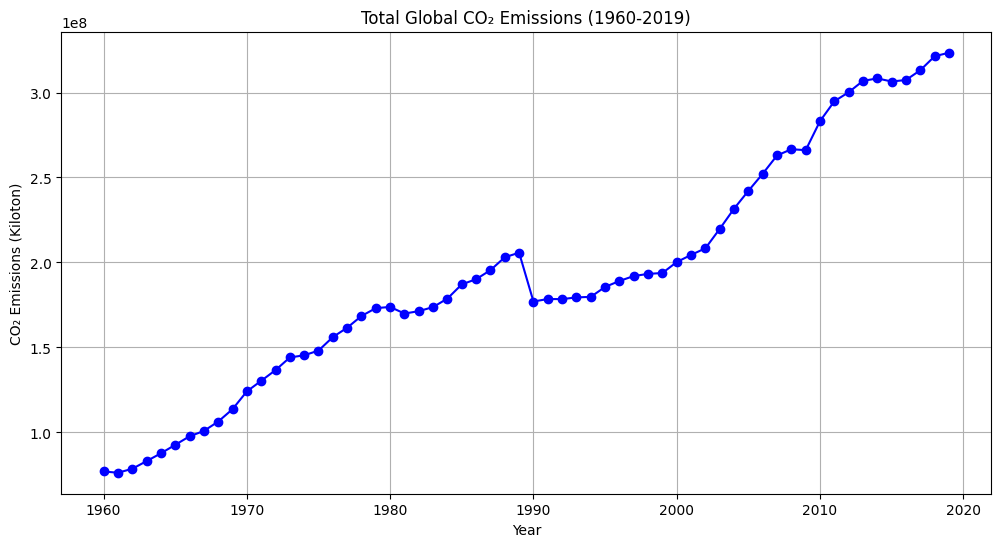

In [23]:

plt.figure(figsize=(12,6))
df_world.groupby("year")["value"].sum().plot(kind="line", color="b", marker='o')
plt.title("Total Global CO₂ Emissions (1960-2019)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Kiloton)")
plt.grid(True)
plt.show()

### **What we see**  

The global CO₂ emissions have shown a significant upward trend over this period, with a few notable anomalies. These anomalies were probably caused by global events such as **economic causes, political conflicts, policy changes, or technological improvements**.  

#### **Why Are Emissions Generally Increasing?**  
Despite these anomalies, CO₂ emissions have continued to rise due to:  
- **Industrialization and Economic Growth:** Expanding economies and industrial output lead to increased **fossil fuel** consumption.  
- **Population Growth:** A rising global population increases energy demand, transportation needs, and industrial production.  
- **Reliance on Fossil Fuels:** The world still heavily depends on coal, oil, and natural gas for energy production.
- 
In the following sections, we will analyze these anomalies in detail and explore their real-world impacts.


## Top 10 CO₂-Emitting Countries Compared to Global Average

Now we plot the top 10 CO₂-emitting countries and compare their emissions to the global mean. This allows us to analyze how the highest emitters contribute to worldwide emissions and assess their deviation from the average.

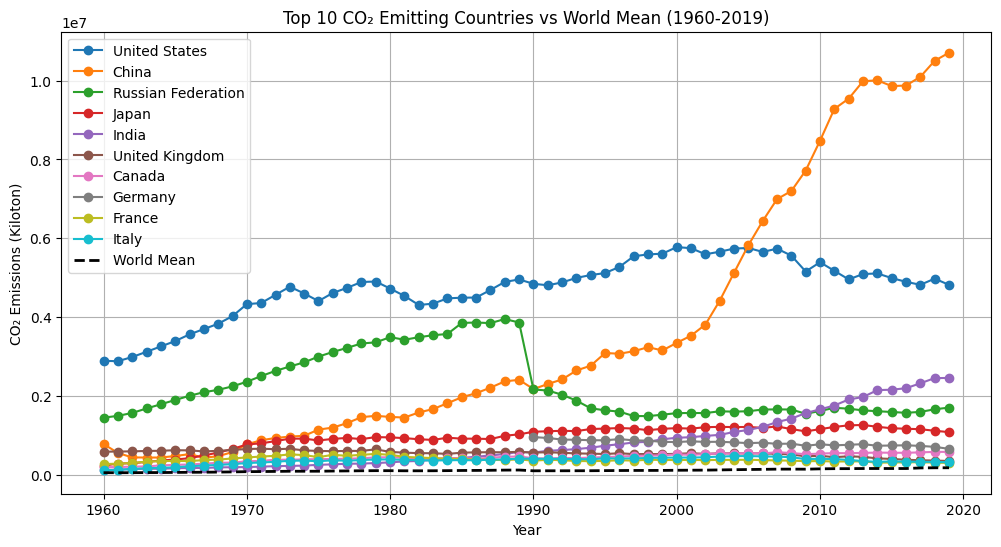

In [24]:


df_top_10 = df_countries_grouped[df_countries_grouped['country_name'].isin(top_10_emissions.index)]


plt.figure(figsize=(12, 6))


for country in top_10_emissions.index:
    country_data = df_top_10[df_top_10['country_name'] == country]
    plt.plot(country_data['year'], country_data['value'], marker='o', label=country)


plt.plot(world_mean.index, world_mean.values, color='black', label='World Mean', linestyle='--', linewidth=2)


plt.title("Top 10 CO₂ Emitting Countries vs World Mean (1960-2019)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Kiloton)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### Understanding the World Mean CO₂ Emissions  

At first, I thought there was an issue with the `world_mean` plot, as it was so close to zero. However, after testing lots of methods to fix it, I realized that the line was actually correct. it just seemed close to zero in comparison to the emissions of the top 10 countries.  

While this may not be a very good comparison because these 10 countries account for nearly 40% of the world's population and they are also leading industrial countries, heavily using fossil fuels, which naturally results in higher emissions.  

### Analysis of CO₂ Emissions in the Top 10 Emitting Countries
While this overview offers insights based on the available data, a more detailed analysis will have a more detailed analysis, focusing on individual countries with appropriately scaled plots.

#### General Observations

Stable Emission Patterns: Countries such as **Italy**, **Canada**, **the United Kingdom**, **France**, and **Germany** have exhibited relatively stable CO₂ emissions over the observed period at least compared to the scale we have and the change of the other 5 countries.

**Japan**: Post-1966, Japan's CO₂ emissions began a gradual increase, because its industrial expansion during this period.

**India**: A notable increase in emissions is shown after 1990, related to the country's rapid economic growth and industrialization.

**Russia**: A huge reduction in emissions occurred around 1989, likely related to the dissolution of the Soviet Union and the economic transformations.

**China**: Emissions have shown a consistent upward growth, specially after 2002, because of China's rapid industrialization and economic boom.

**United States**: Historically, the U.S. maintained the highest emission levels until 2005, after which China's emissions passed got ahead. The U.S. emissions have remained relatively stable without significant fluctuations.

#### Notable Anomalies and Historical Context

Understanding the historical events that have influenced these emission trends is important:

Dissolution of the Soviet Union (1991): The collapse led to economic restructuring in Russia and other former Soviet states, resulting in a huge decrease in industrial activity and associated emissions. So huge that we can see it also on the world global emission.

China's Economic Reforms and Industrialization: Post-2002, China's entry into the World Trade Organization and its focus on manufacturing for global markets led to a sharp increase in emissions.

Global Climate Agreements:

Kyoto Protocol (1997): This international treaty aimed to reduce greenhouse gas emissions. While some countries met their targets, global emissions continued to rise, partly due to increased emissions from rapidly developing countries. 
EN.WIKIPEDIA.ORG

Paris Agreement (2015): A global accord to combat climate change by limiting global warming. Its impact on emission trends varies across countries and requires ongoing assessment.

### **Global Emissions by World Regions**
To have a better perspective on emissions, we grouped all countries into 10 major world regions. These divisions were selected from our previously defined `regions_list` to ensure global coverage while maintaining relevance to emission trends.

The 10 regions are:

- **North America**
- **European Union**
- **Europe & Central Asia**
- **Sub-Saharan Africa**
- **East Asia & Pacific**
- **Middle East & North Africa**
- **South Asia**
- **Africa Eastern and Southern**

By plotting the total emissions of each region over time, we can observe which parts of the world have contributed the most to global CO₂ emissions. This provides a clearer picture of emission trends across continents and economic powerhouses.  


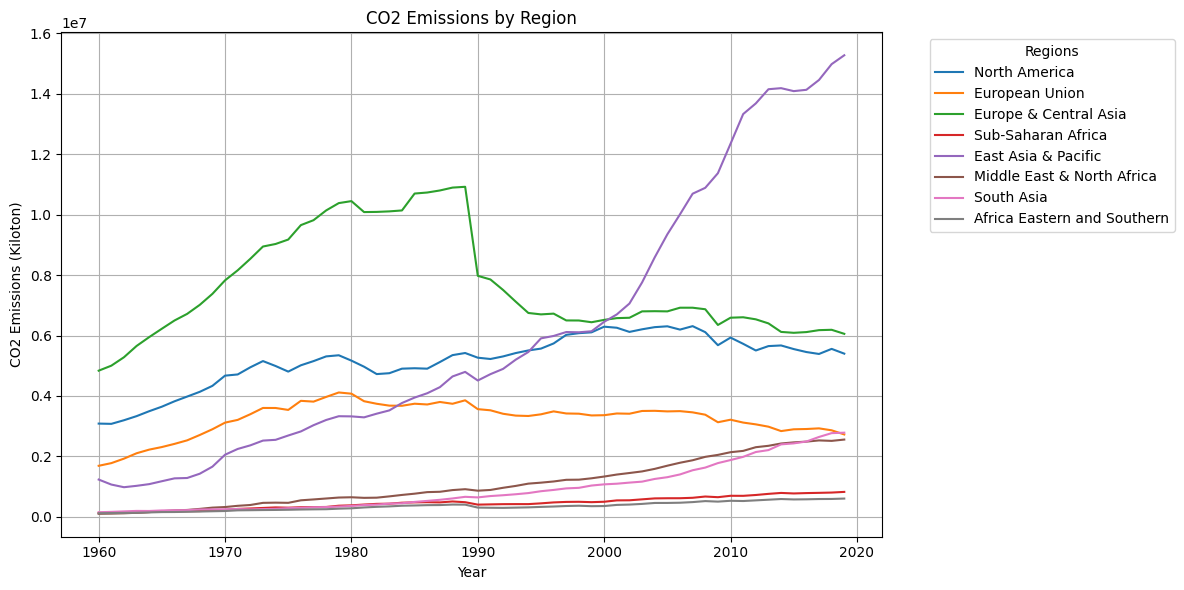

In [25]:

regions_of_interest = [
    'North America', 'European Union', 'Europe & Central Asia', 'Sub-Saharan Africa', 
    'East Asia & Pacific', 'Middle East & North Africa', 'South Asia',
    'Africa Eastern and Southern'
]



df_selected_regions = df[df["country_name"].isin(regions_of_interest)]


df_regions_grouped = df_selected_regions.groupby(['country_name', 'year'])['value'].sum().reset_index()


plt.figure(figsize=(12, 6))
for region in regions_of_interest:
    region_data = df_regions_grouped[df_regions_grouped['country_name'] == region]
    plt.plot(region_data['year'], region_data['value'], label=region)

plt.title('CO2 Emissions by Region')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Kiloton)')
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### CO₂ Emissions by Region Analysis


From the plot, we can see that the regions with the highest emissions are **East Asia & Pacific**, **Europe & Central Asia**, and **North America**.

- The high emissions in **East Asia & Pacific** are mainly due to China and Japan. As China's emissions started to grow significantly after 2005, we can clearly see this increase in the plot.

- **Europe & Central Asia** also shows high emissions, mainly because of countries like Russia, Germany, France, and Italy. The biggest drop we see in this region is in Russia in 1989, which is linked to the collapse of the Soviet Union.

- For **North America** , the emissions line looks similar to the United States' emissions, as Canada and Mexico don’t contribute as much to the emissions compared to the US.

- On the other hand, the regions with the lowest emissions are **Sub-Saharan Africa** and **Africa Eastern and Southern**. This is because these regions have fewer industries, so they don't produce as much CO₂.

- **Middle East & North Africa** and **South Asia show** a steady increase in emissions, which is linked to industrial growth and the use of fossil fuels over time.

### The countries that always emitted more than the global mean:

In [26]:
df_countries_grouped['world_mean'] = world_mean[df_countries_grouped['year'].values].values
df_countries_grouped['above_world_mean'] = df_countries_grouped['value'] > df_countries_grouped['world_mean']


countries_above_world_mean = df_countries_grouped.groupby('country_name')['above_world_mean'].all()
countries_above_world_mean = countries_above_world_mean[countries_above_world_mean].index.tolist()

countries_above_world_mean

['Australia',
 'Canada',
 'China',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Mexico',
 'Poland',
 'Russian Federation',
 'South Africa',
 'United Kingdom',
 'United States']

### Analyzing the Emissions of the Top CO₂ Emitting Countries

Now, we will analyze the CO₂ emissions of the top 10 emitting countries by plotting their emissions over time.

For each country, we will examine key historical events that could have influenced their emission trends. Some of these events include:

- Economic crises (e.g., 2008 financial crisis, 1991 Soviet collapse)
- Wars and geopolitical changes (e.g., World War II, Gulf War, Cold War)
- Energy transitions (e.g., rise of renewables, nuclear energy policies)
- Industrial booms (e.g., China’s economic expansion post-2000)
- Global agreements and policies (e.g., Kyoto Protocol, Paris Agreement)

By analyzing these plots, we aim to understand how historical events shaped CO₂ emissions in each country and compare their trends over time.

### United States CO₂ Emission Analysis (1960-2019)

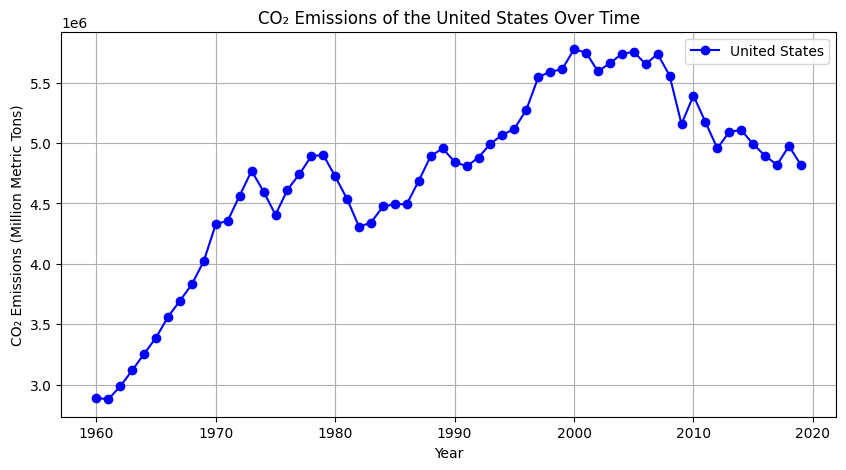

In [27]:
df_us = df_countries[df_countries["country_name"] == "United States"]


plt.figure(figsize=(10, 5))
plt.plot(df_us["year"], df_us["value"], label="United States", color="blue", marker = "o")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the United States Over Time")
plt.legend()
plt.grid(True)
plt.show()


We analyze the historical CO₂ emission trends of the United States, focusing on key rises and falls in emissions and their possible reasons.

#### Key Trends and Events

**1961-1970**: Rapid Rise 
The US emissions increased significantly from 2.88 million tons (1961) to 4.33 million tons (1970). This was likely due to the post-war economic boom, industrial expansion, and a growing automobile industry, leading to higher fossil fuel consumption.

**1970-1971**: Slight Rise 
Emissions increased slightly from 4.33 to 4.35 million tons. This was during the introduction of the Clean Air Act (1970), which aimed to regulate air pollution, but its immediate impact on CO₂ emissions was limited.

**1971-1973**: Rapid Rise 
A sharp increase from 4.35 to 4.77 million tons, possibly due to economic growth and increased energy consumption, especially in manufacturing and transportation.

**1973-1975**: Sharp Fall 
A steep decline from 4.77 to 4.40 million tons occurred due to the 1973 Oil Crisis, caused by OPEC’s embargo. This led to energy shortages, higher oil prices, and reduced fuel consumption.

**1975-1979**: Growth Resumes 
Emissions rose again from 4.40 to 4.90 million tons, as the economy recovered and industries adapted to high oil prices with alternative energy sources and increased coal use.

**1979-1982**: Sharp Fall 
A major drop from 4.90 to 4.30 million tons coincided with the Iranian Revolution (1979) and the Second Oil Crisis (1979-1980), which caused fuel shortages and economic slowdowns, leading to reduced emissions.

**1982-1989**: Gradual Rise 
Emissions steadily climbed from 4.30 to 4.95 million tons as the economy recovered and energy consumption increased.

**1989-1991**: Slight Fall 
A small decline from 4.95 to 4.80 million tons, possibly linked to the collapse of the Soviet Union (1991), which affected global oil markets and economic stability.

**1991-1995**: Moderate Growth 
Emissions increased from 4.80 to 5.11 million tons, likely due to economic expansion and continued reliance on fossil fuels.

**1996-1997**: Sharp Rise 
A sudden increase from 5.27 to 5.54 million tons could be attributed to strong economic growth, industrial expansion, and increased energy demand in the late 1990s.

**2000**: Peak Emission 
The highest recorded US emission was 5.77 million tons in 2000, marking the peak of fossil fuel dependency before policy shifts and technological advancements.

**2008-2009**: Sharp Fall 
A steep decline from 5.55 to 5.15 million tons due to the 2008 Global Financial Crisis, which reduced industrial activity and energy consumption.

**2010-2012**: Another Sharp Fall 
Another drop from 5.39 to 4.95 million tons, likely due to increasing renewable energy adoption, natural gas replacing coal, and environmental regulations.

**2012-2019**: Gradual Decline 
Emissions continued to fall slightly, reaching 4.81 million tons in 2019, driven by energy efficiency improvements, a shift to renewable energy, and environmental policies.

### China CO₂ Emission Analysis (1961-2019)

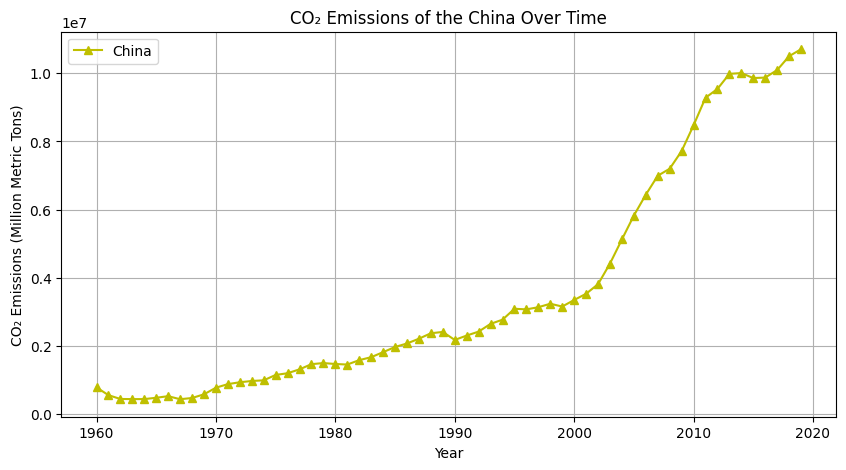

In [28]:
df_ch = df_countries[df_countries["country_name"] == "China"]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_ch["year"], df_ch["value"], label="China", color="y", marker="^")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the China Over Time")
plt.legend()
plt.grid(True)
plt.show()


This analysis examines China's CO₂ emission trends from 1961 to 2019, highlighting key periods of increase and their potential causes.

#### Key Trends and Events

**1961-2000**: Slight Increase with Minor Fluctuations 

China's emissions rose steadily during this period, with minor decreases in years like 1967, 1981, 1990, and 1999. These fluctuations could be because of policy shifts, economic adjustments, or external geopolitical events affecting industrial output.

**Post-2000**: Rapid Surge in Emissions 

After 2000, China experienced a huge and sustained increase in CO₂ emissions, reaching approximately 10 million tons by 2014. This raise could be related to several key developments:

- Economic Expansion: China's entry into the World Trade Organization (WTO) in 2001 marked its deeper integration into the global economy, leading to rapid industrialization and urbanization. This economic boom resulted in increased energy consumption, more from coal, to meet the needs of manufacturing development.

- Energy Production: The reliance on coal as the primary energy source contributed substantially to the rise in emissions. Despite efforts to diversify energy sources, coal remained dominant due to its abundance and cost-effectiveness.

- Urbanization and Infrastructure: Massive infrastructure projects and urban development required significant energy inputs, further elevating CO₂ emissions.

**2014-2015**: Slight Reduction 

A minor decrease in emissions occurred during this period, possibly due to:

- Economic Transition: China's shift from an export-driven economy to one focused on domestic consumption and services may have temporarily reduced industrial output. And also the **GDP** growth rate slowed from 7.4% in 2014 to 6.9% in 2015, reducing industrial output and energy consumption.

- Environmental Policies: Implementation of policies aimed at reducing air pollution and promoting renewable energy sources began to take effect, contributing to a slight decline in emissions. In response to severe air pollution ("smog crisis"), China implemented the **"War on Pollution"** campaign. Also with stronger environmental policies in **limited coal usage** and increased investments in **renewable energy** (solar, wind).
Cities like Beijing shut down major coal power plants to improve air quality.

**2015-2019**: Renewed Growth 

After the brief decline, emissions resumed an upward trend, reaching approximately 10.7 million tons by 2019. This resurgence can be linked to:

Continued Industrial Activity: Ongoing industrial production and infrastructure projects maintained high energy demands.

Energy Consumption Patterns: Despite advancements in renewable energy, the continued use of fossil fuels, particularly coal, sustained elevated CO₂ emission levels.

This makes China’s emission trends unique: while they aggressively expanded renewable energy, they still relied on fossil fuels to power economic growth. 

### **Russia CO₂ Emissions Analysis (1960-2019)**  

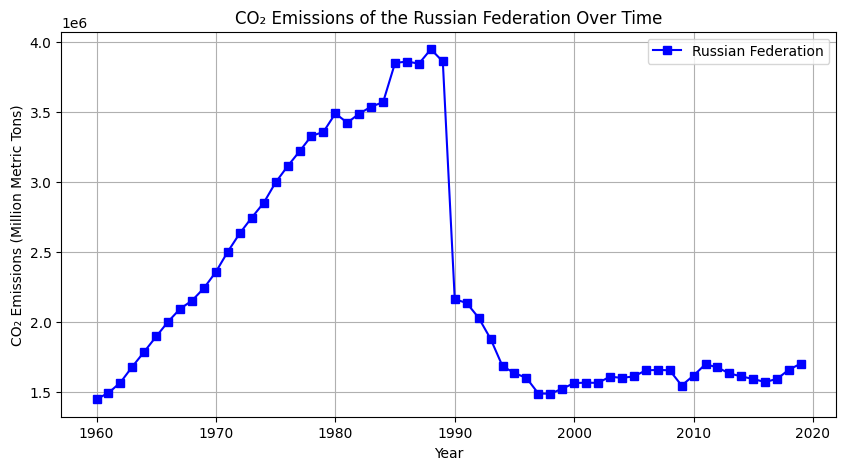

In [29]:
df_ru = df_countries[df_countries["country_name"] == "Russian Federation"]


plt.figure(figsize=(10, 5))
plt.plot(df_ru["year"], df_ru["value"], label="Russian Federation", color="blue", marker = "s")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the Russian Federation Over Time")
plt.legend()
plt.grid(True)
plt.show()


#### **1960-1980: Rapid Industrial Growth** 
- Emissions increased significantly from **1.45 million** in 1960 to **3.49 million** in 1980.  
- This period saw **massive industrialization under the Soviet Union**, driven by heavy industry, energy production, and military expansion.  
- The Soviet Union was the world's largest oil and gas producer so events like oil crisis due to the Iranian revolution in 1979 did not effect the emission of this country at all, so energy consumption rose sharply.  

#### **1980-1981: Slight Decrease**  
- Emissions dropped slightly from **3.49 million (1980) to 3.43 million (1981)**.  
- This may be linked to the **economic stagnation** that started in the late 1970s, as Soviet productivity began to decline.  
- There were also **oil price fluctuations** globally, affecting the Soviet economy, which relied heavily on energy exports.  

#### **1981-1984: Slower Increase**  
- Emissions rose modestly to **3.57 million (1984)**.  
- The economy was still growing, but at a slower rate due to **inefficiencies in central planning** and declining innovation in industry.  

#### **1984-1985: Sharp Increase in One Year**  
- Emissions jumped significantly to **3.85 million (1985)**.  
- This could be linked to the leadership change to **Mikhail Gorbachev (1985)** and efforts to boost economic activity before major reforms.  

#### **1985-1987: No notable change**  
- Emissions remained almost the same at **3.85 million (1985) to 3.84 million (1987)**.  
- Gorbachev introduced **Perestroika (economic restructuring)**, but its effects on industry were slow.  

#### **1989-1990: The Largest Drop in the Whole Project**  
- Emissions **collapsed from 3.86 million (1989) to 2.16 million (1990)**.  
- This was due to the **dissolution of the Soviet Union (1991)**:  
  - The **Soviet economy collapsed**, leading to a major drop in industrial production.  
  - After separation, Russian federeation’s **population decreased by 49%**, land area seperated and shrank by **24%**, and industry declined by **40-50%**.  
  - Many Soviet-era factories shut down due to lack of funding, reducing emissions.  
  - Energy-intensive industries in former Soviet states (Ukraine, Kazakhstan) were no longer counted as Russian emissions.

#### **1990-1997: Continued Decline**  
- Emissions **continued dropping to 1.49 million (1997)**, but with a slower slope.  
- The **Russian economy struggled heavily** during the 1990s, leading to:  
  - **Deindustrialization** – Many Soviet-era factories remained closed.  
  - **Privatization of industries**, leading to reduced energy-intensive production.  
  - A **financial crisis in 1998** that further weakened industrial output.  

#### **1997-2008: Slow Recovery**  
- Emissions **increased slightly to 1.65 million (2008)**.  
- Russia’s economy **stabilized** in the 2000s due to:  
  - **Oil and gas exports booming** – Russia became a major supplier to Europe and China.  
  - **Industrial recovery**, but with more efficiency than in the Soviet era.  

#### **2008-2009: Slight Drop Due to Global Financial Crisis**  
- Emissions fell to **1.55 million (2009)** due to the **2008 global financial crisis**:  
  - The crisis reduced global energy demand, affecting Russian exports.  
  - Industrial production slowed down as global markets shrank.  

#### **2009-2011: Recovery**  
- Emissions rose to **1.69 million (2011)**, following economic stabilization and increased oil exports.  

#### **2011-2016: Gradual Decline**  
- Emissions dropped slightly to **1.57 million (2016)**.  
- This may be linked to:  
  - **International sanctions (2014)** after Crimea’s annexation, reducing industrial activity.  
  - A global push for **energy efficiency** and cleaner energy.  

#### **2016-2019: Slight Increase**  
- Emissions rose to **1.70 million (2019)**, likely due to:  
  - **Increased energy exports** to China.  
  - Some **re-industrialization efforts**, though not at Soviet levels.  
  - More stable economic policies after years of volatility.  

### **Japan CO₂ Emissions Analysis (1960-2019)** 

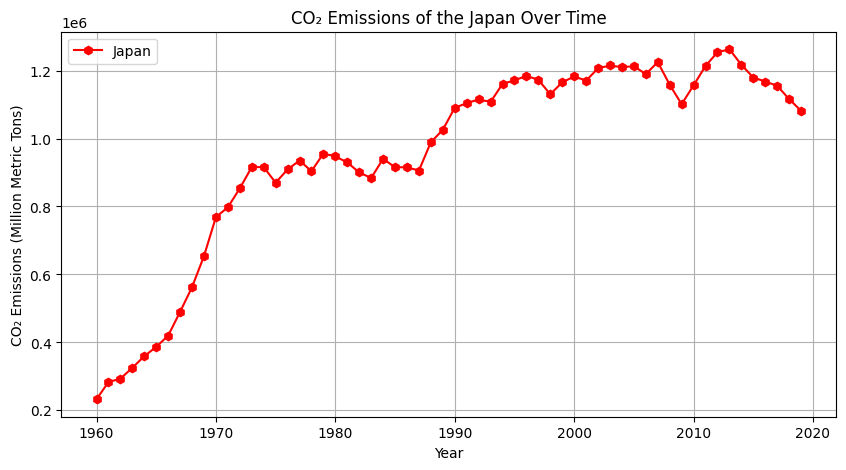

In [30]:
df_ja = df_countries[df_countries["country_name"] == "Japan"]


plt.figure(figsize=(10, 5))
plt.plot(df_ja["year"], df_ja["value"], label="Japan", color="r", marker = "h")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the Japan Over Time")
plt.legend()
plt.grid(True)
plt.show()


#### **1960-1970: Rapid Industrial Growth**  
- Emissions rised from **232,781 (1960) to 768,823 (1970)**, more than **tripling** in a decade.  
- **Key Reasons:**
  - **Post-war economic boom** – Japan became an industrial powerhouse, producing steel, automobiles, and electronics.  
  - **Energy demand surged**, relying heavily on imported oil.  
  - **Urbanization and infrastructure development** led to higher energy consumption.  

#### **1973-1987: Fluctuations with Oil Crises**  
- Emissions peaked at **915,749 (1973)**, then fluctuated before stabilizing at **905,734 (1987)**.  
- **Key Events:**
  - **1973 Oil Crisis** – The Arab oil embargo caused global oil shortages, forcing Japan to cut energy use and **invest in energy efficiency**.  
  - **1980s energy shift** – Japan diversified its energy sources, increasing **nuclear power** and reducing dependence on oil.  
  - The economy remained strong, but emissions were **not rising as sharply** due to efficiency improvements.  

#### **1987-1990: Slightly Steeper Rise**  
- Emissions increased to **1,090,530 (1990)**.  
- **Key Factors:**
  - Economic expansion during the **Japanese asset bubble** (late 1980s), with heavy investment in industries and real estate.  
  - Increased industrial output and **higher energy consumption**.  
  - Rise in car ownership and transportation emissions.  

#### **1990-2007: Gradual Increase with Occasional Dips**  
- Emissions **gradually increased** to **1,225,070 (2007)**.  
- **Key Events:**
  - **Kyoto Protocol (1997)** – Japan committed to reducing emissions, leading to more efficient energy use.  
  - **Economic stagnation (1990s Lost Decade)** – The **burst of the asset bubble** slowed emissions growth but did not cause a decline.  
  - **Early 2000s economic recovery** increased industrial activity.  
  - Expansion of **nuclear power** helped keep emissions from rising too fast.  

#### **2007-2009: Sharp Decline Due to Global Financial Crisis**  
- Emissions **fell sharply** from **1,225,070 (2007) to 1,100,980 (2009)**.  
- **Key Reasons:**
  - The **2008 global financial crisis** reduced industrial production and energy consumption.  
  - Japan’s **export-driven economy** suffered due to lower global demand for cars, electronics, and machinery.  

#### **2009-2013: Strong Recovery**  
- Emissions rebounded to **1,262,780 (2013)**, surpassing pre-crisis levels.  
- **2011 Fukushima Nuclear Disaster** – After the tsunami and nuclear meltdown, Japan **shut down almost all nuclear reactors**.  

#### **2013-2019: Significant Decline**
- Emissions **fell sharply to 1,081,570 (2019)**.  
- **Key Reasons:**
  - **Renewable energy expansion** – Japan invested in **solar and wind power** after Fukushima.  
  - **Energy efficiency measures** – Government policies promoted energy conservation.  
  - Some **nuclear reactors restarted**, reducing fossil fuel dependence.  
  - Economic growth slowed slightly, reducing energy demand.  


### **India CO₂ Emissions Analysis (1960-2019)**  

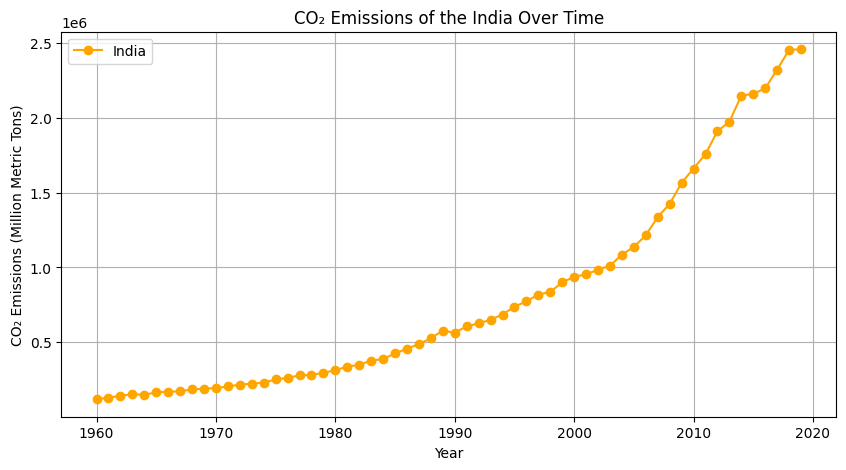

In [31]:
df_in = df_countries[df_countries["country_name"] == "India"]


plt.figure(figsize=(10, 5))
plt.plot(df_in["year"], df_in["value"], label="India", color="orange", marker = "o")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the India Over Time")
plt.legend()
plt.grid(True)
plt.show()


#### **1960-2003: Consistent Growth in Emissions**  
- Emissions increased from **120,582 (1960) to 1,011,770 (2003)**, showing **steady growth** over four decades.  
- **Key Factors:**
  - **Industrialization** – India transitioned from an agricultural economy to an **industrial economy**, increasing energy demand.  
  - **Population growth** – India’s **population exploded** during this period, leading to higher energy consumption.  
  - **Coal dependency** – India heavily relied on **coal-powered plants** for electricity.  
  - **Economic liberalization (1991)** – After opening its markets, India saw rapid industrial growth, **boosting emissions further**.  

#### **2003-2019: Sharp Increase in Emissions**  
- Emissions **more than doubled** from **1,011,770 (2003) to 2,456,300 (2019)**.  
- **Key Factors:**
  - **Rapid economic growth** – India became one of the **fastest-growing economies**, increasing energy demand.  
  - **Urbanization and infrastructure boom** – Construction, transport, and manufacturing expanded rapidly.  
  - **Coal-fired power plants surged** – India remained dependent on **coal**, with **minimal renewables** in early 2000s.  
  - **Transportation emissions increased** – More cars, highways, and industrial expansion **raised fossil fuel use**.  
  - **2010s shift towards renewables** – Although coal use remained high, India **started investing in solar and wind energy**, slowing the growth rate of emissions in the late 2010s.  


### **United Kingdom CO₂ Emissions Analysis (1960-2019)**  

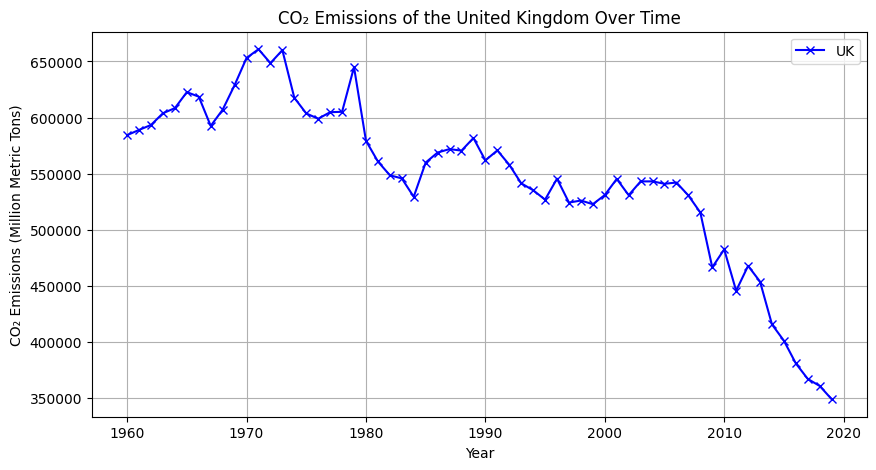

In [32]:
df_uk = df_countries[df_countries["country_name"] == "United Kingdom"]


plt.figure(figsize=(10, 5))
plt.plot(df_uk["year"], df_uk["value"], label="UK", color="b", marker = "x")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the United Kingdom Over Time")
plt.legend()
plt.grid(True)
plt.show()


#### **1960-1965: Slight Increase in Emissions**  
- Emissions rose from **584,299 (1960) to 622,619 (1965)**.  
- **Key Factors:**
  - **Post-war industrial expansion** – The UK was still benefiting from industrial recovery after WWII.  
  - **Increased coal use** – Coal was the primary energy source, powering industries and homes.  

#### **1965-1967: Sharp Decline**  
- Emissions dropped from **622,619 (1965) to 592,517 (1967)**.  
- **Possible Reasons:**
  - **Early shift from coal to oil and natural gas** – The UK began moving away from coal due to air pollution concerns.  
  - **Decline in heavy industries** – Some old factories became less competitive.  

#### **1967-1971: Sharp Increase**  
- Emissions peaked at **660,863 (1971)**, the highest in UK history.  
- **Key Factors:**
  - **Economic boom** – The late 1960s saw strong industrial growth and increased energy use.  
  - **Coal dominance** – Despite early shifts, coal remained a major energy source.  

#### **1978-1979: Very Sharp Rise**  
- Emissions rose from **605,084 (1978) to 644,893 (1979)**.  
- **Key Factors:**
  - **Cold winters** – Higher energy demand for heating.  
  - **Economic growth** – Industries expanded during this period.  

#### **1979-1984: Sharp Decline**  
- Emissions dropped from **644,893 (1979) to 529,335 (1984)**.  
- **Key Factors:**
  - **1979 oil crisis & recession** – Energy prices surged, reducing consumption.  
  - **Thatcher’s economic policies** – They started limiting industries, with coal mines closing and heavy industries shrinking.  

#### **1984-1989: Temporary Rise**  
- Emissions increased to **581,721 (1989)**.  
- **Possible Reasons:**
  - **Economic recovery** – Industrial and energy sectors regained stability.  
  - **Coal use remained significant** – Despite declining industry, coal power plants still operated.  

#### **1989-2019: Continuous Decline**  
- Emissions fell steadily after 1989, reaching **348,920 (2019)**.  
- **Key Factors:**
  - **Coal phase-out** – The UK drastically reduced coal use, replacing it with natural gas and renewables.  
  - **Strict environmental regulations** – Policies like the **Climate Change Act (2008)** promoted cleaner energy.  
  - **Economic shift** – The UK moved from heavy industry to a **service-based economy**, reducing emissions.  

#### **2008-2009: Sharp Drop**  
- Emissions fell from **515,340 (2008) to 466,489 (2009)**.  
- **Key Reason:**
  - **Global financial crisis** – Economic slowdown reduced industrial and transport emissions.  

#### **2009-2019: Continuous Sharp Decline**  
- Emissions fell further to **348,920 (2019)**.  
- **Key Factors:**
  - **Massive renewable energy expansion** – Wind and solar power grew rapidly.  
  - **Carbon pricing & regulations** – The UK introduced carbon taxes and emissions caps.  
  - **Energy efficiency improvements** – Better insulation, electric vehicles, and cleaner industries contributed.
**By 2019, the UK had one of the lowest emissions among major economies due to its transition to renewables and a service-based economy**.  


### **Canada CO₂ Emissions Analysis (1960-2019)**  

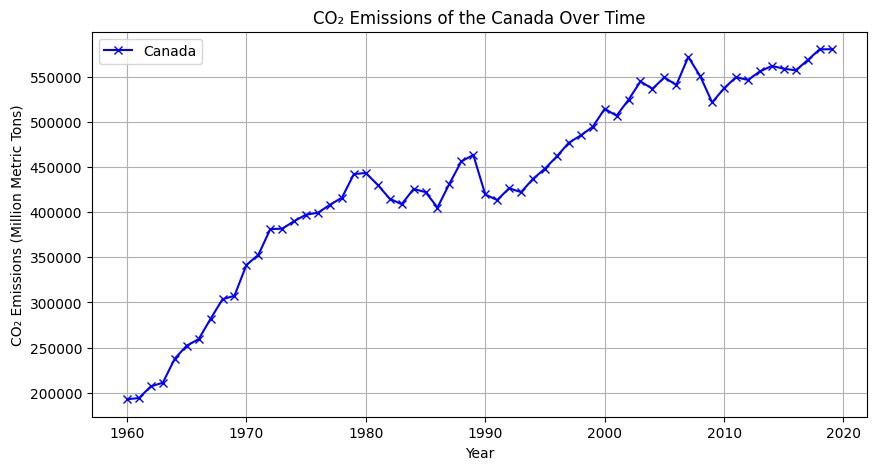

In [33]:
df_ca = df_countries[df_countries["country_name"] == "Canada"]


plt.figure(figsize=(10, 5))
plt.plot(df_ca["year"], df_ca["value"], label="Canada", color="b", marker = "x")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the Canada Over Time")
plt.legend()
plt.grid(True)
plt.show()


#### **1960-1989: Continuous Rise**  
- Emissions increased from **192,895 (1960) to 463,274 (1989)**.  
- **Key Factors:**
  - **Industrial expansion** – Canada saw significant industrial growth, especially in resource extraction (oil, gas, and mining).  
  - **Oil sands development** – Alberta’s oil sands industry began expanding in the late 1960s and grew significantly in the 1980s.  
  - **Energy-intensive economy** – Cold winters and vast distances lead higher fossil fuel consumption for heating and transportation.  

#### **1989-1990: Sharp Decline**  
- Emissions dropped from **463,274 (1989) to 419,490 (1990)**.  
- **Possible Reasons:**
  - **Soviet collapse (1989-1991)** – The global economy faced uncertainties, affecting trade and industrial output.  
  - **North American economic slowdown** – The late 1980s saw slower growth, reducing industrial energy demand.  

#### **1990-2007: Gradual Increase**  
- Emissions climbed again, reaching **571,630 (2007)**.  
- **Key Factors:**
  - **Economic and population growth** – The Canadian economy expanded steadily, increasing energy demand.  
  - **Oil sands boom** – The early 2000s saw rapid growth in Alberta’s oil production.  
  - **Urbanization & transport emissions** – More cars, flights, and urban expansion led to higher fossil fuel use.  

#### **2007-2009: Significant Drop**  
- Emissions fell from **571,630 (2007) to 521,320 (2009)**.  
- **Key Reasons:**
  - **Global financial crisis (2008)** – The recession slowed industrial production and energy consumption.  
  - **Reduced oil demand** – Lower economic activity led to reduced fossil fuel consumption.  

#### **2009-2019: Recovery and Stabilization**  
- Emissions increased slightly to **580,210 (2019)** but did not rise sharply.  
- **Key Factors:**
  - **Economic recovery** – After 2009, industries and transport emissions rebounded.  
  - **Government climate policies** – Canada introduced carbon pricing and clean energy initiatives, slowing emission growth.  
  - **Oil industry fluctuations** – While oil production remained high, regulatory efforts balanced out emissions.  
**Canada remains one of the world’s top emitters due to its reliance on fossil fuels, but recent policies have slowed growth.**  


### **Germany CO₂ Emissions Analysis (1990-2019)**  

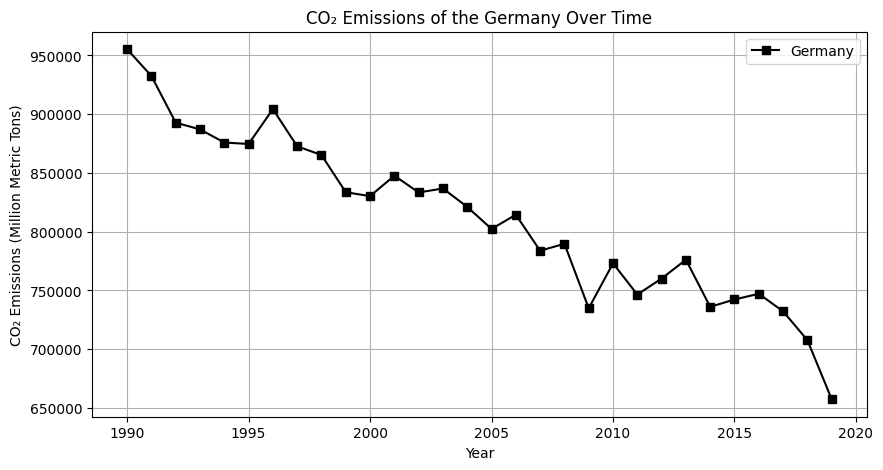

In [34]:
df_ge = df_countries[df_countries["country_name"] == "Germany"]


plt.figure(figsize=(10, 5))
plt.plot(df_ge["year"], df_ge["value"], label="Germany", color="black", marker = "s")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the Germany Over Time")
plt.legend()
plt.grid(True)
plt.show()


Germany has been one of the most industrialized nations in the world, yet it has consistently reduced its CO₂ emissions over the years. This decline is significant given its large-scale industry and energy demands.

#### **1990-1995: Major Decline**  
- Emissions fell from **955,310 (1990) to 874,660 (1995)**.  
- **Key Factors:**  
  - **German reunification (1990)** – The collapse of East Germany (GDR) led to the shutdown of many inefficient and polluting factories.  
  - **Shift from coal to cleaner energy** – East Germany’s old coal plants were decommissioned, reducing emissions.  
  - **Industrial modernization** – Western Germany's advanced technology was introduced in the East, making industries more energy-efficient.  

#### **1995-1996: Slight Increase**  
- Emissions rose slightly to **904,340 (1996)**.  
- **Possible Reasons:**  
  - **Economic recovery after reunification** – East Germany’s transition period stabilized, and industrial activity increased.  
  - **Cold winter in 1996** – Higher heating demand likely caused a temporary increase in fossil fuel use.  

#### **1996-2019: Continuous Decline**  
- Emissions dropped steadily to **657,400 (2019)**.  
- **Key Factors:**  
  - **Energiewende ("Energy Transition")** – Germany aggressively shifted towards renewable energy sources like wind and solar.  
  - **Strong climate policies** – Introduction of carbon pricing, emissions trading, and regulations on coal power.  
  - **Closure of coal and nuclear plants** – Germany phased out many coal-fired power plants and started shutting down nuclear plants after 2011.  
  - **Energy efficiency in industry** – Industrial processes became cleaner and more efficient due to technological advancements.  


### **France CO₂ Emissions Analysis (1960-2019)**  

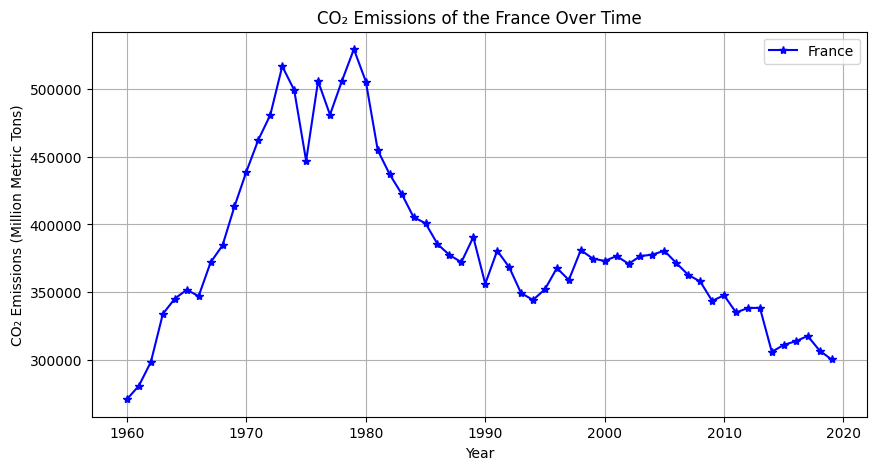

In [35]:
df_fa = df_countries[df_countries["country_name"] == "France"]


plt.figure(figsize=(10, 5))
plt.plot(df_fa["year"], df_fa["value"], label="France", color="blue", marker = "*")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the France Over Time")
plt.legend()
plt.grid(True)
plt.show()


France's emissions profile is marked by **sharp rises and falls** in the early years, followed by a long-term **steady decline** since the 1980s.  

#### **1960-1973: Rapid Increase**  
- Emissions surged to **516,599 (1973)**.  
- **Key Factors:**  
  - **Post-WWII economic boom ("Les Trente Glorieuses")** – Rapid industrialization and urbanization.  
  - **Expansion of fossil fuel use** – Heavy reliance on coal and oil for energy production.  

#### **1974-1975: Sharp Decline**  
- Emissions dropped to **446,919 (1975)**.  
- **Main Reason: 1973 Oil Crisis**  
  - France, like many Western nations, faced an economic shock due to rising oil prices.  
  - The government introduced **energy-saving policies** and reduced oil dependency.  

#### **1977-1979: Emissions Peak Again**  
- Emissions hit a new high of **529,155 (1979)**.  
- **Possible Causes:**  
  - **Economic recovery** – France resumed industrial expansion.  
  - **Short-term increase in fossil fuel usage before nuclear expansion.**  

#### **1980-1981: Very Sharp Drop**  
- Fell from **529,155 (1979) → 505,363 (1980) → 454,700 (1981)**.  
- **Main Reason: France’s Nuclear Revolution**  
  - France aggressively **transitioned to nuclear energy** in response to the 1970s oil crises.  
  - **Nuclear power plants replaced coal and oil**, significantly cutting emissions.  

#### **1981-2019: Long-Term Decline**  
- From **454,700 (1981) → 356,240 (1990) → 300,519 (2019)**.  
- **Key Drivers:**  
  - **Massive nuclear energy adoption** – By the 1990s, nuclear provided over 70% of France’s electricity.  
  - **Carbon policies and EU environmental regulations.**  
  - **Investments in renewables and energy efficiency.**

**France’s emissions peaked in 1979 before dropping sharply.**   
**Nuclear energy was the game-changer, leading to a long-term reduction.**  
**France now has one of the lowest per capita emissions among major industrial nations.**  


### **Italy CO₂ Emissions Analysis (1960-2019)**  

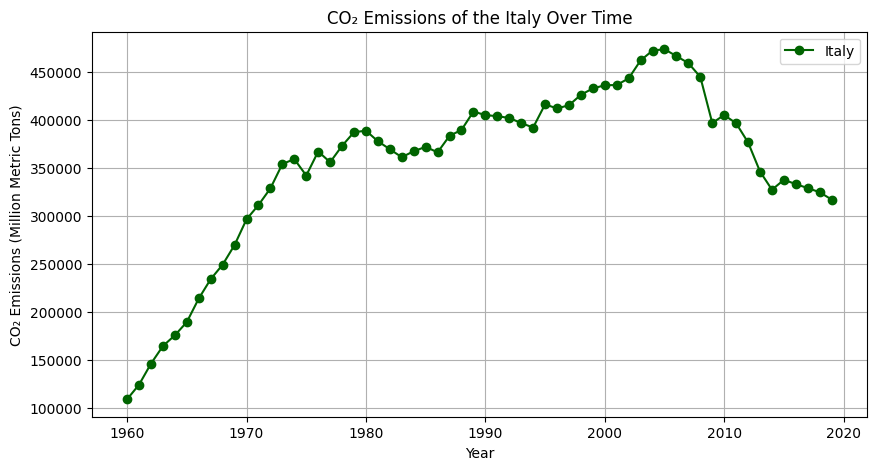

In [36]:
df_it = df_countries[df_countries["country_name"] == "Italy"]


plt.figure(figsize=(10, 5))
plt.plot(df_it["year"], df_it["value"], label="Italy", color="darkgreen", marker = "o")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.title("CO₂ Emissions of the Italy Over Time")
plt.legend()
plt.grid(True)
plt.show()


Italy’s emissions followed **a long-term rise until 2005**, after which they entered a **steady decline**. The 2008 financial crisis caused a particularly sharp drop.  

#### **1960-1973: Very Sharp Increase**  
- **Emissions: 109,357 (1960) → 354,320 (1973)**  
- **Key Factors:**  
  - **Post-war economic boom ("Italian Economic Miracle")** – Rapid industrial growth and urbanization.  
  - **Massive energy consumption increase** – Heavy reliance on oil, coal, and gas.  
  - **Infrastructure expansion** – Development of highways, factories, and industrial zones.  

#### **1973-2005: Gradual Increase (With Some Fluctuations)**  
- **Emissions peaked at 473,829 (2005).**  
- **Main Reasons:**  
  - **Continued industrial and economic expansion.**  
  - **Increased use of automobiles and road transport.**  
  - **Dependence on fossil fuels despite some early renewable energy efforts.**  
  - **1973 and 1979 Oil Crises temporarily slowed emissions growth**, but Italy eventually adapted by diversifying its energy sources.  

#### **2005-2019: Declining Trend**  
- **Sharp drop after 2005, especially 2008-2009.**  
- **2008-2009: Global Financial Crisis**  
  - Emissions **fell sharply from 444,980 (2008) → 397,059 (2009).**  
  - **Major economic recession reduced industrial activity and energy demand.**  
  - Decline in manufacturing, construction, and transportation emissions.  

#### **2010-2019: Continued Reduction**  
- **Emissions reached 317,239 (2019).**  
- **Key Drivers:**  
  - **Shift towards renewable energy** (wind, solar, hydro).  
  - **EU carbon policies and stricter environmental regulations.**  
  - **Improved energy efficiency and sustainable transport policies.**  
  - **Declining industrial output and economic stagnation in some sectors.**  


### Conclusion

In this project, I wanted to analyze CO₂ emissions in different countries and see what factors cause high emissions and what helps reduce them. I’m not an expert in environmental science, but I am interested in data analysis and want to continue researching climate change from my perspective.

From the analysis, we found that **the biggest sources of CO₂ emissions are burning fossil fuels for energy, transportation, heavy industries like steel and cement production, and deforestation.** Countries that rely a lot on coal, oil, and gas for electricity and industry have the highest emissions. Also, high car usage and air travel add a lot to emissions.

On the other hand, some factors helped countries reduce their emissions. The most important ones were **switching to renewable energy (like wind, solar, and hydroelectric)**, improving energy efficiency, better public transportation, and reforestation projects. Countries that focused on **nuclear power** also kept emissions lower compared to those using coal.

Some countries have been successful in reducing CO₂ emissions. **Germany** has cut emissions by using more renewable energy and phasing out coal and has very low emissions because they use a lot of hydropower and electric vehicles. **France** keeps emissions low by using nuclear power instead of fossil fuels. On the other hand, countries like **China**, **India**, and **the U.S.** still have high emissions because **they rely heavily on coal and have large industries and transportation networks.**

This project helped me understand how different energy choices and policies affect a country’s emissions. It also showed that switching to cleaner energy sources and improving efficiency can really make a difference. I plan to continue learning more about climate data and improving my data analysis skills to work on more complex problems in the future.

### Gautam Kumar